# 図表を作る

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
from ds2s_OV import ds2s_OV, plot_pattern, plot_fundamental 

## 典型的なds2s-OVモデルの時空図

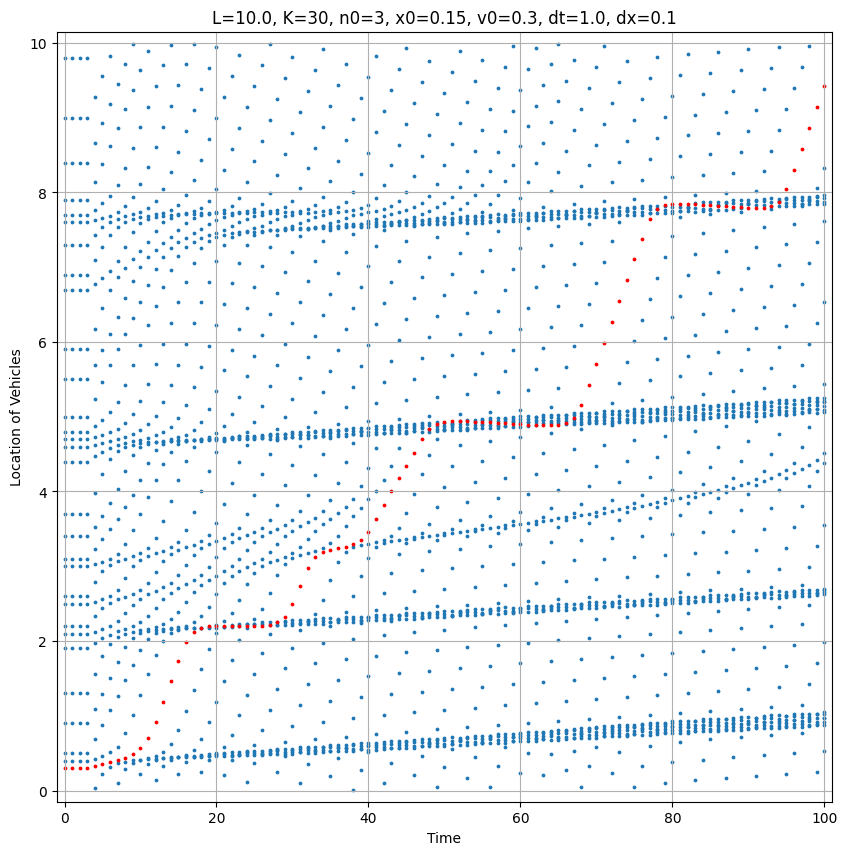

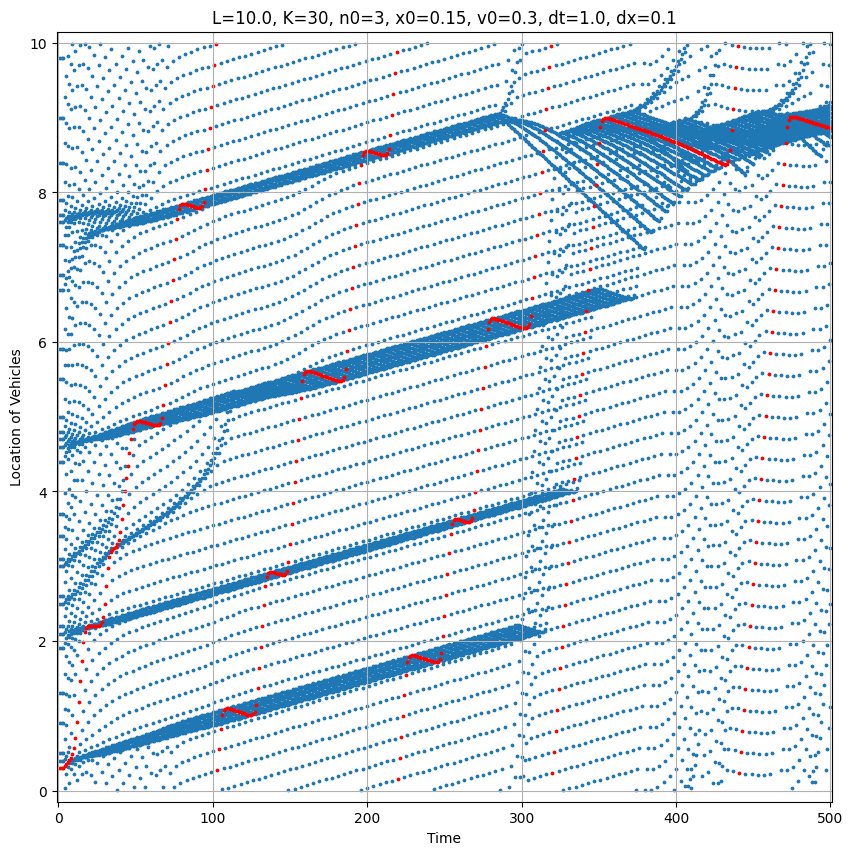

In [3]:
model = ds2s_OV(
	L=10.0,
	K=30,
	n_0=3,
	x_0=0.15,
	v_0=0.3,
	dt=1.0,
	dx=0.1,
	x_init=sorted(random.sample([0.1*i for i in range(100)], 30)),
	n_max=1010,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 0, 500)

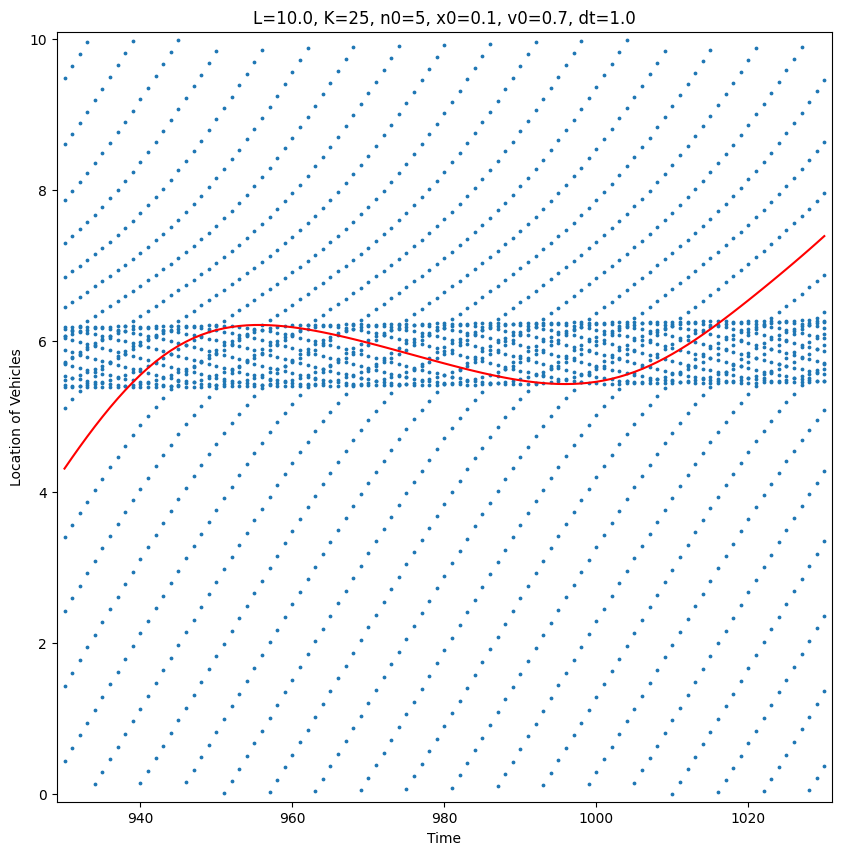

In [4]:
model = ds2s_OV(
	L=10.0,
	K=25,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=sorted([4.0 + 0.1*i for i in range(25)]),
	n_max=2010,
)
model.simulate()

ni, nf = 930, 1030
x = np.array([[j for i in range(1, model.K)] for j in range(ni, nf+1)]) \
	.flatten()
y = model.x[ni:nf+1, 1:model.K].flatten()
plt.figure(figsize=(10, 10))
plt.title(
	"L={}, K={}, n0={}, x0={}, v0={}, dt={}"
		.format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt)
)
plt.xlabel("Time")
plt.ylabel("Location of Vehicles")
plt.xlim((ni-1, nf+1))
plt.ylim((-model.x_0, model.L+model.x_0))
plt.scatter(x, y, s=3)
# 一台目の車両の位置をプロット
x = np.array([j for j in range(ni, nf+1)])
y = model.x[ni:nf+1, 0]
plt.plot(x, y, c="red")
plt.show()

## us2s-OV CAの基本図

n_0=   4, v_0=0.50, K= 100

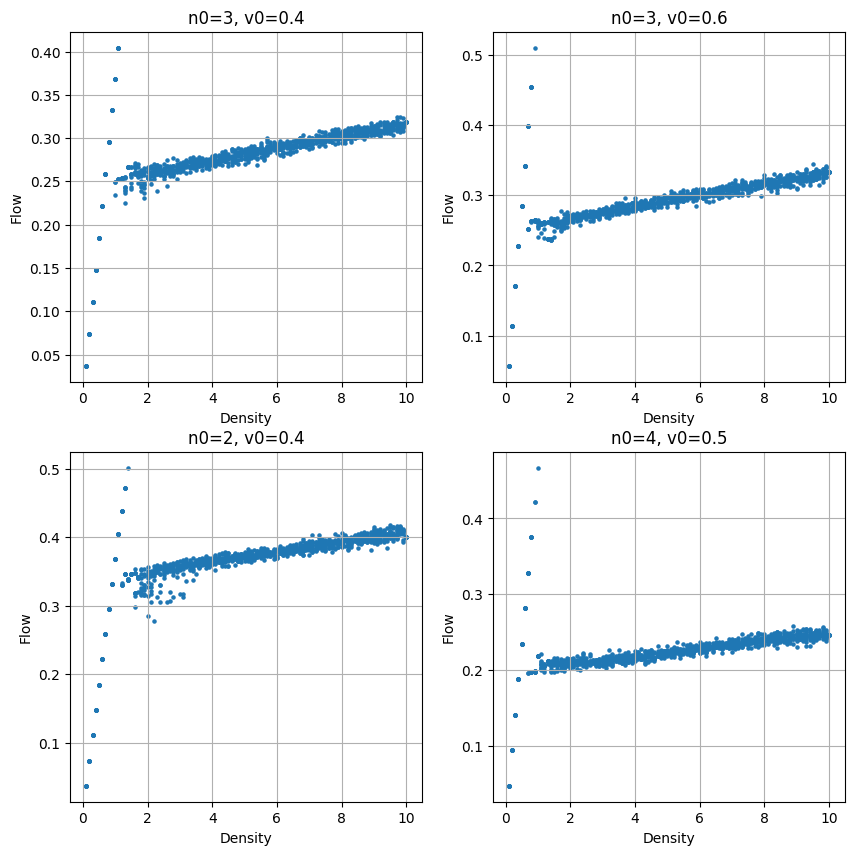

In [8]:
L = 10.0
x_0 = 0.1
dt = 1.0
dx = 0.1
n_max = 10010
n_0_list = [3, 3, 2, 4]
v_0_list = [0.4, 0.6, 0.4, 0.5]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

axs = [ax1, ax2, ax3, ax4]


for ax, n_0, v_0 in zip(axs, n_0_list, v_0_list):
	density = []
	flow = []
	for K in range(1, 101):
		for _ in range(10):
			print("\rn_0={:4}, v_0={:4.2f}, K={:4}".format(n_0, v_0, K), end="")
			model = ds2s_OV(
				L=L,
				K=K,
				n_0=n_0,
				v_0=v_0,
				x_init=random.sample([0.1 * i for i in range(100)], K),
				n_max=n_max,
				x_0=x_0,
				dt=dt,
				dx=dx
			)
			model.simulate()
			density.append(model.density())
			flow.append(model.flow(ni=9000, nf=10000))
	plot_fundamental(ax, model, density, flow)